## LOAN APPROVAL MODELING

> `Risk Score Regression`: To predict a continuous risk score associated with each individual's likelihood of loan default or financial instability.

> `Binary Classification`: To determine the binary outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## DATA

https://www.kaggle.com/datasets/lorenzozoppelletto/financial-risk-for-loan-approval?select=Loan.csv

In [2]:
df=pd.read_csv('Loan (2).csv')
df

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


# step 1.Understanding the data

In [3]:
print("the feature of Loan dataset are:")

features=len(df.columns)
ftrs_list=[ftr for ftr in df.columns]

for ftr in ftrs_list:
    print(ftr)

the feature of Loan dataset are:
ApplicationDate
Age
AnnualIncome
CreditScore
EmploymentStatus
EducationLevel
Experience
LoanAmount
LoanDuration
MaritalStatus
NumberOfDependents
HomeOwnershipStatus
MonthlyDebtPayments
CreditCardUtilizationRate
NumberOfOpenCreditLines
NumberOfCreditInquiries
DebtToIncomeRatio
BankruptcyHistory
LoanPurpose
PreviousLoanDefaults
PaymentHistory
LengthOfCreditHistory
SavingsAccountBalance
CheckingAccountBalance
TotalAssets
TotalLiabilities
MonthlyIncome
UtilityBillsPaymentHistory
JobTenure
NetWorth
BaseInterestRate
InterestRate
MonthlyLoanPayment
TotalDebtToIncomeRatio
LoanApproved
RiskScore


----------------------------------------------------------------------------------------------------------------------------------------------

Explanation of the features in the dataset:

1. **ApplicationDate**: The date when the loan application was submitted.
2. **Age**: The age of the loan applicant.
3. **AnnualIncome**: The yearly income of the applicant, typically used to evaluate loan repayment capacity.
4. **CreditScore**: A numerical representation of the applicant’s creditworthiness based on their credit history.
5. **EmploymentStatus**: The current employment status of the applicant (e.g., employed, unemployed, self-employed).
6. **EducationLevel**: The highest level of education attained by the applicant.
7. **Experience**: The number of years the applicant has been in their current occupation or field.
8. **LoanAmount**: The amount of money the applicant is requesting as a loan.
9. **LoanDuration**: The period (in months or years) over which the loan is to be repaid.
10. **MaritalStatus**: The marital status of the applicant (e.g., single, married, divorced).
11. **NumberOfDependents**: The number of people financially dependent on the applicant (e.g., children, elderly parents).
12. **HomeOwnershipStatus**: Whether the applicant owns, rents, or has other living arrangements regarding their home.
13. **MonthlyDebtPayments**: The total amount the applicant is currently paying each month toward their existing debts.
14. **CreditCardUtilizationRate**: The percentage of available credit being used by the applicant (credit card balance divided by total credit limit).
15. **NumberOfOpenCreditLines**: The number of active credit accounts the applicant has (e.g., credit cards, loans).
16. **NumberOfCreditInquiries**: The number of times a credit inquiry has been made on the applicant’s account (usually when applying for credit).
17. **DebtToIncomeRatio**: The ratio of the applicant’s total monthly debt payments to their monthly income, used to assess their ability to take on more debt.
18. **BankruptcyHistory**: Indicates whether the applicant has filed for bankruptcy in the past.
19. **LoanPurpose**: The reason why the applicant is seeking the loan (e.g., home improvement, education, medical).
20. **PreviousLoanDefaults**: The number of times the applicant has defaulted on previous loans.
21. **PaymentHistory**: A record of the applicant’s past payments on loans and credit lines.
22. **LengthOfCreditHistory**: The number of years the applicant has had active credit accounts.
23. **SavingsAccountBalance**: The amount of money in the applicant’s savings account.
24. **CheckingAccountBalance**: The amount of money in the applicant’s checking account.
25. **TotalAssets**: The total value of assets owned by the applicant (e.g., property, vehicles, investments).
26. **TotalLiabilities**: The total amount of liabilities (debts) the applicant owes.
27. **MonthlyIncome**: The applicant’s total monthly income.
28. **UtilityBillsPaymentHistory**: A record of how well the applicant has managed paying their utility bills.
29. **JobTenure**: The length of time the applicant has held their current job.
30. **NetWorth**: The difference between the applicant’s total assets and total liabilities.
31. **BaseInterestRate**: The general interest rate set by the financial institution or the market.
32. **InterestRate**: The specific interest rate offered to the applicant for the loan.
33. **MonthlyLoanPayment**: The amount the applicant will need to pay each month to repay the loan.
34. **TotalDebtToIncomeRatio**: A more comprehensive debt-to-income ratio that includes all of the applicant’s liabilities.
35. **`LoanApproved`**: Indicates whether the loan was approved or not (usually binary: Yes/No).
36. **`RiskScore`**: A score representing the risk level of the applicant, usually derived from various financial and personal factors to help determine loan approval and interest rate.

These features help in assessing the financial health, creditworthiness, and risk profile of the loan applicant, which ultimately determines loan approval, terms, and interest rates.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [5]:
df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


In [6]:
df.describe(include=["O"]).T

,count,unique,top,freq
ApplicationDate,20000,20000,2018-01-01,1
EmploymentStatus,20000,3,Employed,17036
EducationLevel,20000,5,Bachelor,6054
MaritalStatus,20000,4,Married,10041
HomeOwnershipStatus,20000,4,Mortgage,7939
LoanPurpose,20000,5,Home,5925


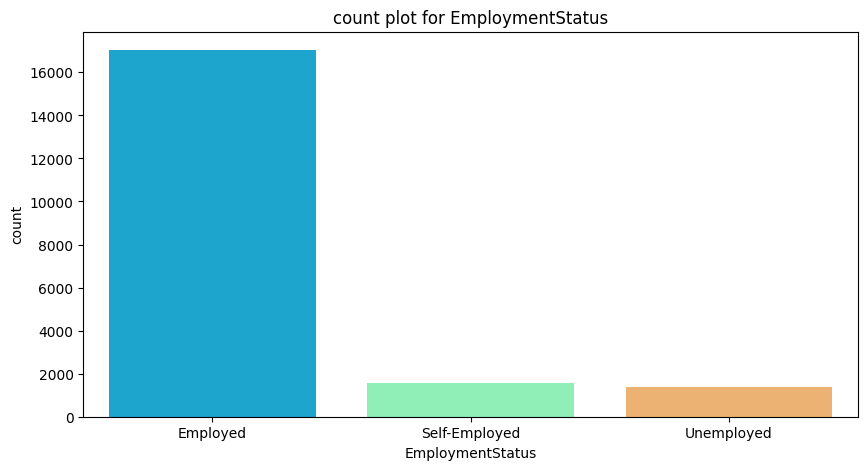

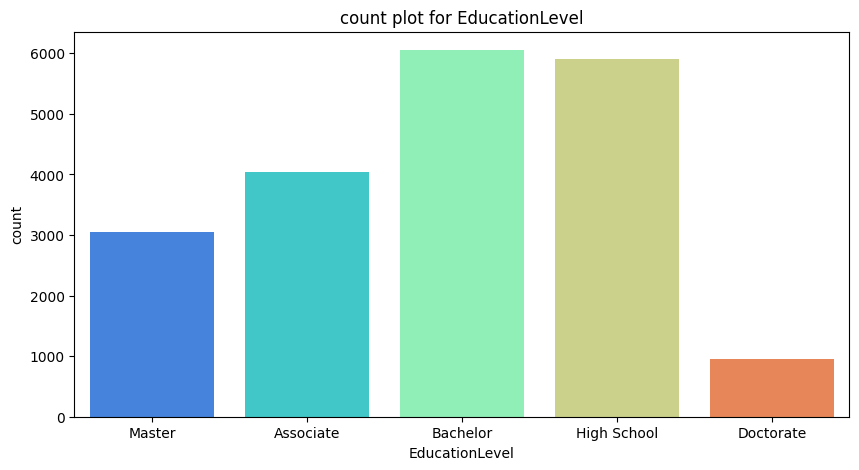

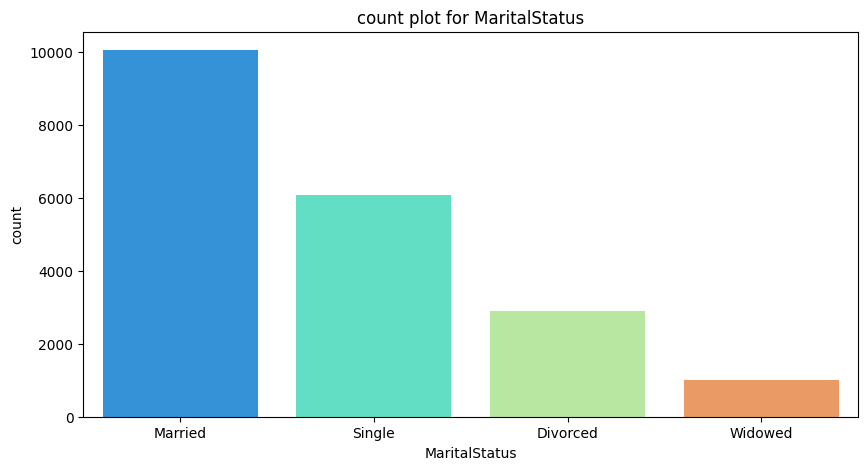

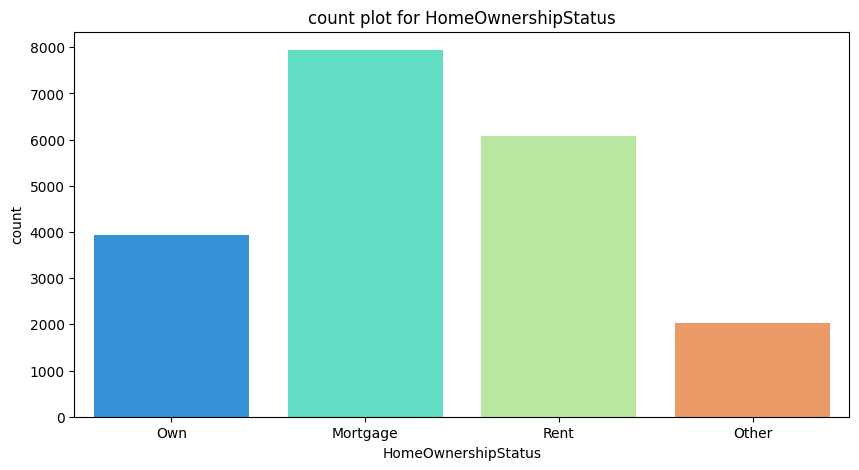

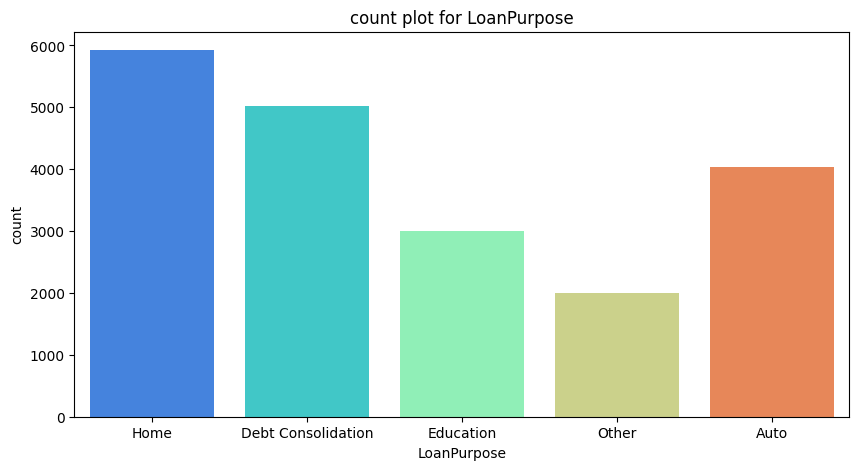

In [7]:
categorical_columns = df.select_dtypes(include=['object','category']).columns.tolist()
for col in categorical_columns[1:]:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=col, hue=col, palette='rainbow')
    plt.title(f"count plot for {col}")
    plt.show()

Most of the loan needed persons are 

* Employed

* Married

* Comparitively less educatied

* Need loan for building home

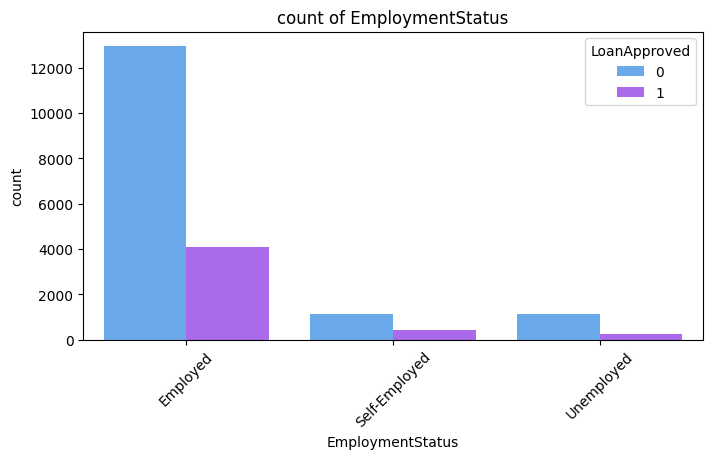

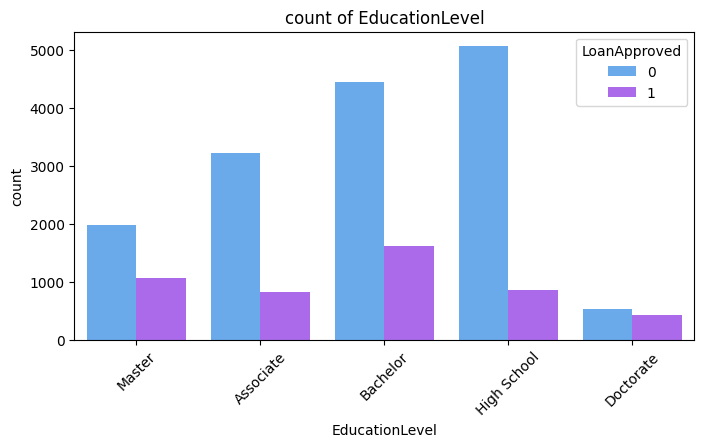

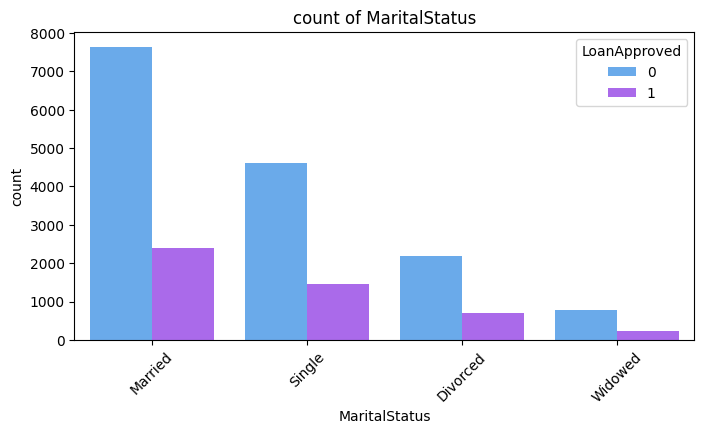

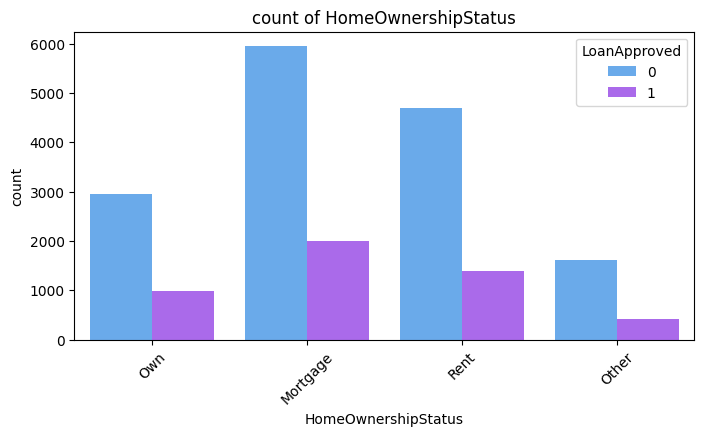

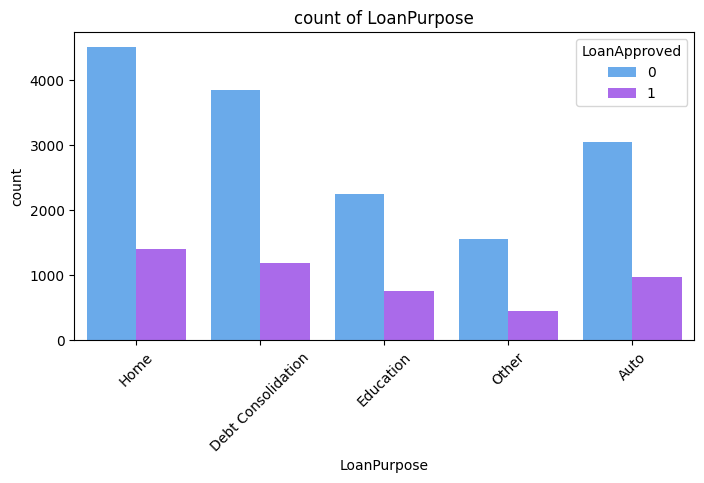

In [8]:
for col in categorical_columns[1:]:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, palette='cool',  hue='LoanApproved')
    plt.title(f"count of {col}")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.xticks(rotation=45)
    plt.show()

* Majority of loan requests are  rejected in all categories (there might be some other reason affecting the riskscore).

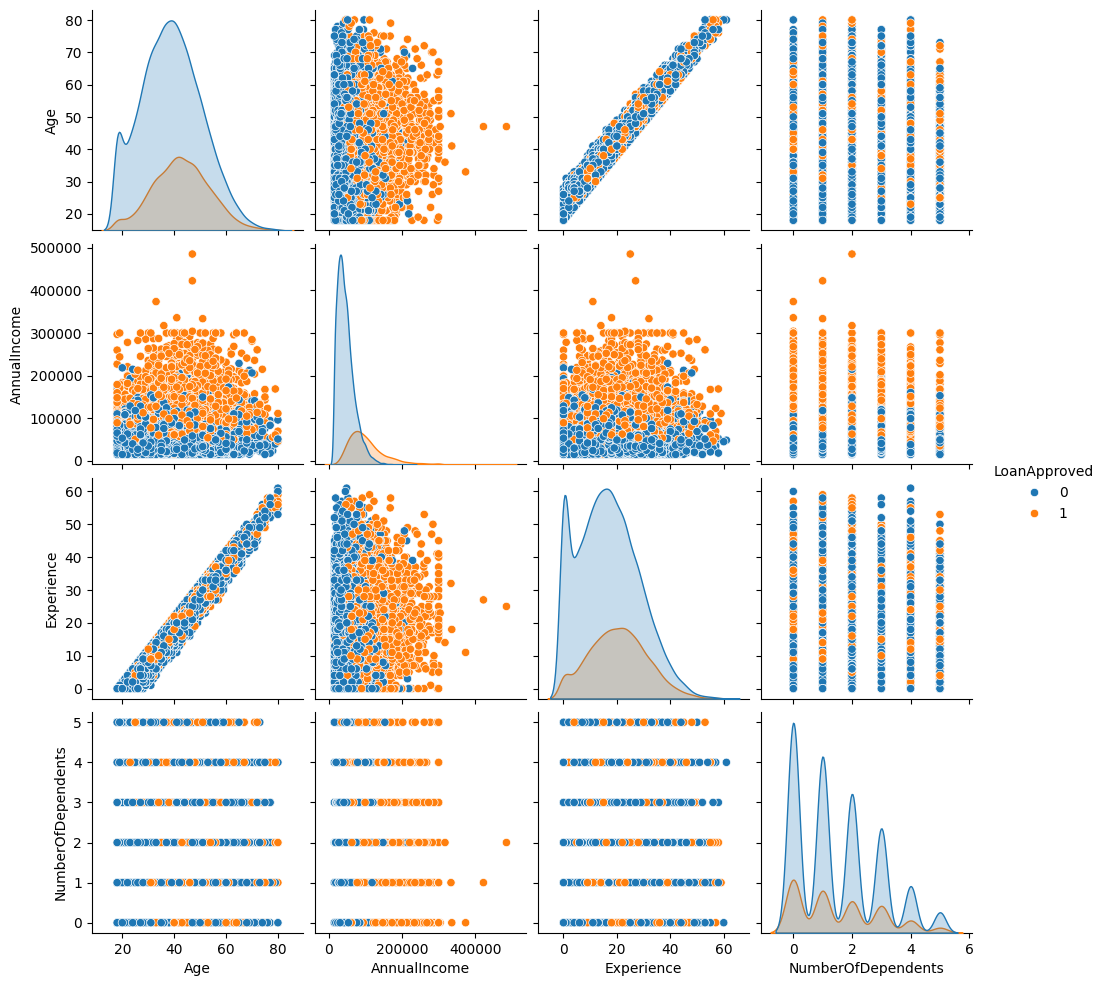

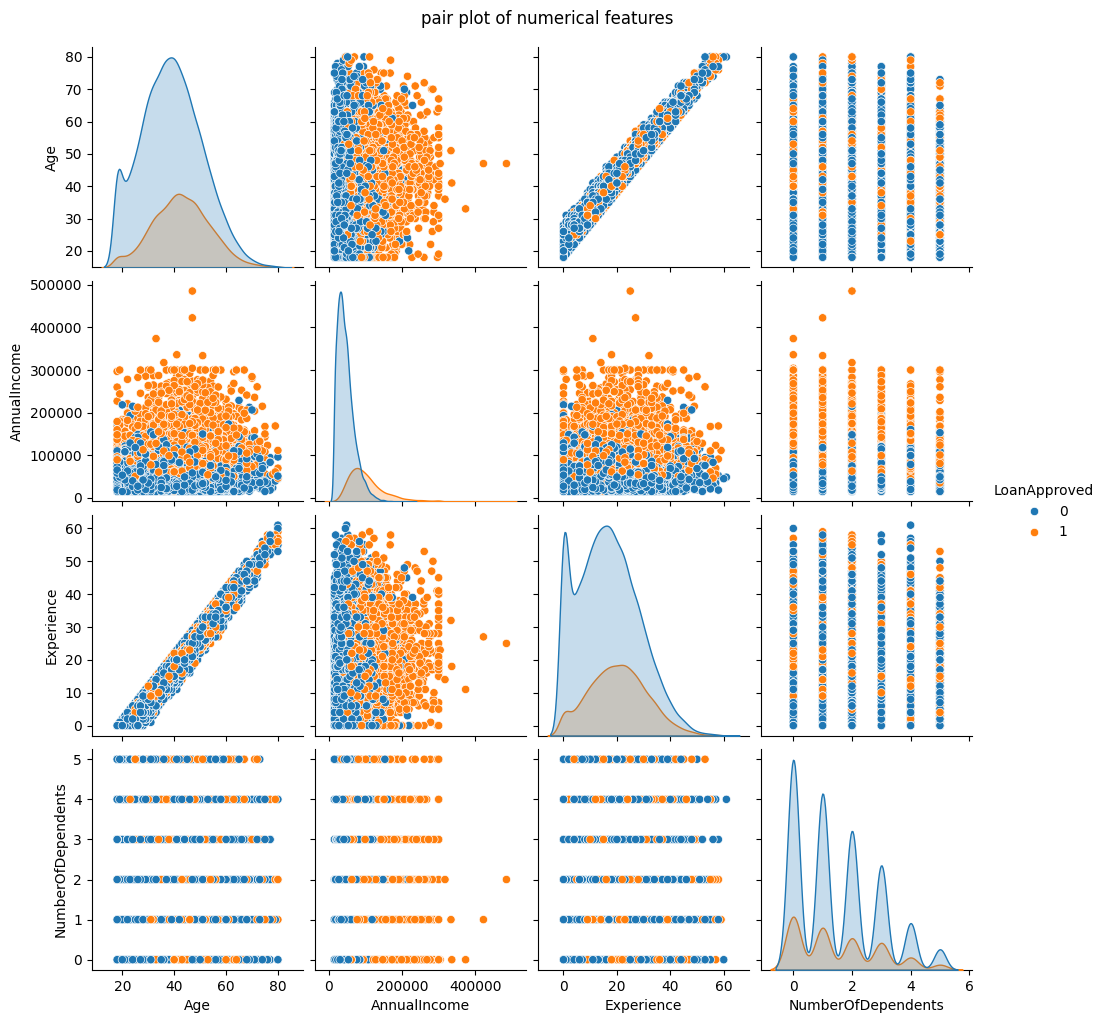

In [9]:
sns.pairplot(df[['Age','AnnualIncome','Experience','NumberOfDependents','LoanApproved']], hue='LoanApproved')
sns.pairplot(df[['Age','AnnualIncome','Experience','NumberOfDependents','LoanApproved']], hue='LoanApproved')

plt.suptitle("pair plot of numerical features", y=1.02)
plt.show()

Text(0.5, 0, 'composition of LoanApproved')

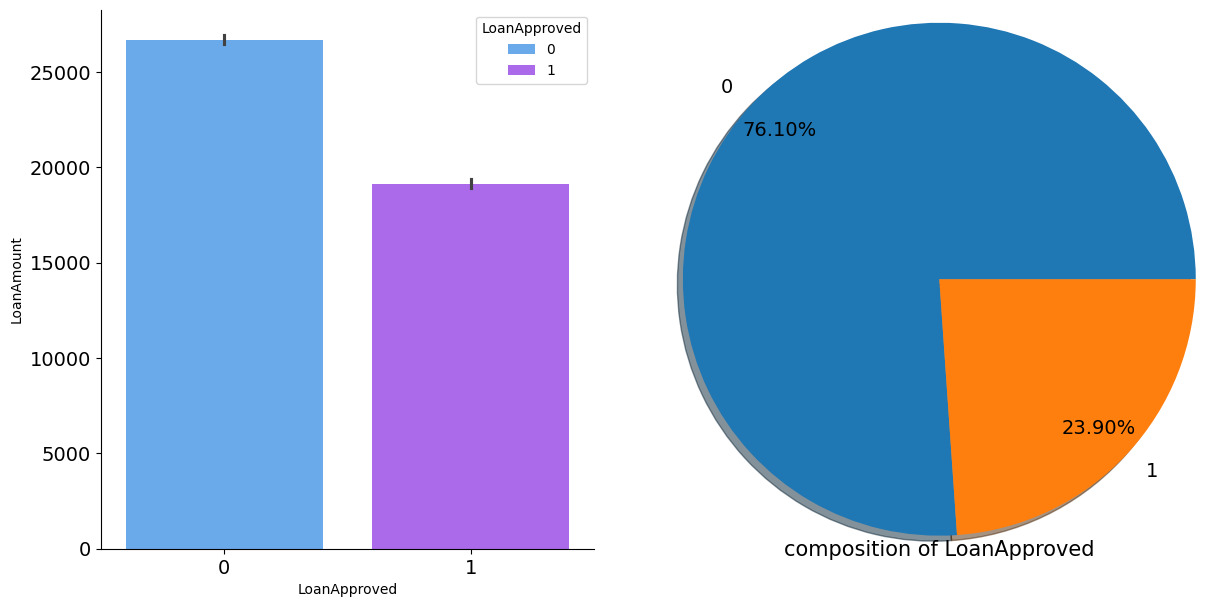

In [10]:
plt.figure(figsize=(14,7))

ax1=plt.subplot(1,2,1)
cp = sns.barplot(x='LoanApproved', y='LoanAmount', data=df, palette='cool', hue='LoanApproved',)
ax1.set_xlabel("LoanApproved")
ax1.set_ylabel("LoanAmount")

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)

ax2=plt.subplot(1,2,2)
plt.pie(x=df['LoanApproved'].value_counts(), labels=list(df['LoanApproved'].unique()),
        autopct='%2.2f%%', 
        pctdistance=0.85,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14})
ax2.set_xlabel(" ")
plt.xlabel('composition of LoanApproved', fontsize=15, labelpad=10)

## DATA CLEANING


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.isnull().sum().sum()

np.int64(0)

## DATA TRANSFORMATION

## FEATURE ENGINEERING

In [13]:
df['BankBalance']=df['SavingsAccountBalance']+df['CheckingAccountBalance']

df.drop('SavingsAccountBalance', axis=1, inplace=True)
df.drop('CheckingAccountBalance', axis=1, inplace=True)

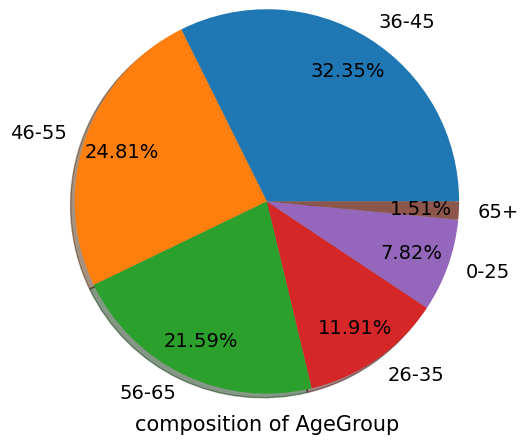

In [14]:
df['AgeGroup']=pd.cut(df['Age'], bins=[0,25,35,45,55,65,100],
                      labels=['0-25','26-35','36-45','46-55','56-65','65+'])


plt.pie(x=df['AgeGroup'].value_counts(),
labels=list(df['AgeGroup'].unique()),
autopct='%2.2f%%',
pctdistance=0.8,
shadow=True,
radius=1.3,
textprops={'fontsize':14})
plt.xlabel('composition of AgeGroup', fontsize=15, labelpad=20)
plt.show()

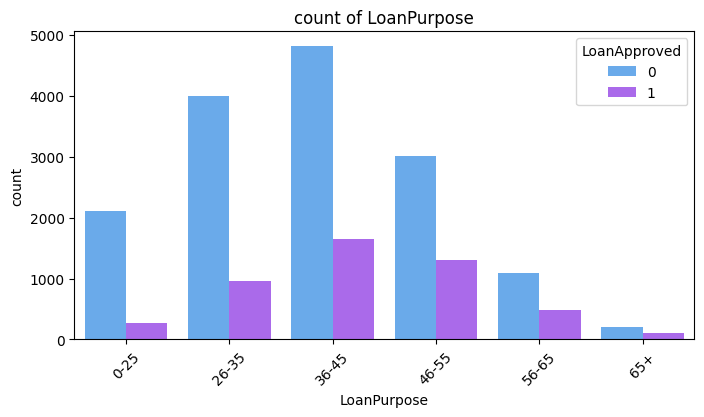

In [15]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='AgeGroup', palette='cool',  hue='LoanApproved')
plt.title(f"count of {col}")
plt.xlabel(col)
plt.ylabel("count")
plt.xticks(rotation=45)
plt.show()

In [16]:
df.drop('AgeGroup', axis=1, inplace=True)

In [17]:
df[['year','month','day']] = df['ApplicationDate'].str.split('-', expand=True)

df["year"] = df["year"].astype(int)
df["month"] = df["month"].astype(int)
df["day"] = df["day"].astype(int)

df[['ApplicationDate','year','month','day']]

,ApplicationDate,year,month,day
0,2018-01-01,2018,1,1
1,2018-01-02,2018,1,2
2,2018-01-03,2018,1,3
3,2018-01-04,2018,1,4
4,2018-01-05,2018,1,5
...,...,...,...,...
19995,2072-09-29,2072,9,29
19996,2072-09-30,2072,9,30
19997,2072-10-01,2072,10,1
19998,2072-10-02,2072,10,2


In [18]:
df.drop(['ApplicationDate','year','month','day'], axis=1, inplace=True)

## ENCODING

In [19]:
categorical_columns=df.select_dtypes(include=['object','category']).columns.tolist()

print("categorical columns:", categorical_columns)


categorical columns: ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']


__ordinal Data__


       many machine learning models,like decision trees and regression models,rely on the relative order of numeric values by manually  assigning meaningfull numbers, the model can better capture the relationship between the ordinal categories

In [20]:
df['MaritalStatus'].unique()

array(['Married', 'Single', 'Divorced', 'Widowed'], dtype=object)

In [21]:
df['HomeOwnershipStatus'].unique()

array(['Own', 'Mortgage', 'Rent', 'Other'], dtype=object)

In [22]:
df['LoanPurpose'].unique()

array(['Home', 'Debt Consolidation', 'Education', 'Other', 'Auto'],
      dtype=object)

In [23]:
df['EducationLevel'].unique()

array(['Master', 'Associate', 'Bachelor', 'High School', 'Doctorate'],
      dtype=object)

In [24]:
df['EmploymentStatus'].unique()

array(['Employed', 'Self-Employed', 'Unemployed'], dtype=object)

In [25]:
df['EmploymentStatus']=df['EmploymentStatus'].map({'Employed':3, 'Self-Employed':2, 'Unemployed':1})

df['EducationLevel']=df['EducationLevel'].map({'Master':3, 'Associate':1, 'Bachelor':2, 'High School':0, 'Doctorate':4})


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  int64  
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  int64  
 4   EducationLevel              20000 non-null  int64  
 5   Experience                  20000 non-null  int64  
 6   LoanAmount                  20000 non-null  int64  
 7   LoanDuration                20000 non-null  int64  
 8   MaritalStatus               20000 non-null  object 
 9   NumberOfDependents          20000 non-null  int64  
 10  HomeOwnershipStatus         20000 non-null  object 
 11  MonthlyDebtPayments         20000 non-null  int64  
 12  CreditCardUtilizationRate   20000 non-null  float64
 13  NumberOfOpenCreditLines     200

## label encoding

In [27]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

order=["Widowed","Divorced","Single","Married"]
ordinal=OrdinalEncoder(categories=[order])
df['MaritalStatus']=ordinal.fit_transform(df[['MaritalStatus']])
df['MaritalStatus'].value_counts()

MaritalStatus
3.0    10041
2.0     6078
1.0     2882
0.0      999
Name: count, dtype: int64

## label encoding

In [75]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

la=LabelEncoder()

for col in df.select_dtypes('object').columns:
    df[col]=la.fit_transform(df[col])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  int64  
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  int64  
 4   EducationLevel              20000 non-null  int64  
 5   Experience                  20000 non-null  int64  
 6   LoanAmount                  20000 non-null  int64  
 7   LoanDuration                20000 non-null  int64  
 8   MaritalStatus               20000 non-null  float64
 9   NumberOfDependents          20000 non-null  int64  
 10  HomeOwnershipStatus         20000 non-null  int64  
 11  MonthlyDebtPayments         20000 non-null  int64  
 12  CreditCardUtilizationRate   20000 non-null  float64
 13  NumberOfOpenCreditLines     200

## step4: Data Transforming

###  (4.1)Skewed Data

__HISTOGRAMS__

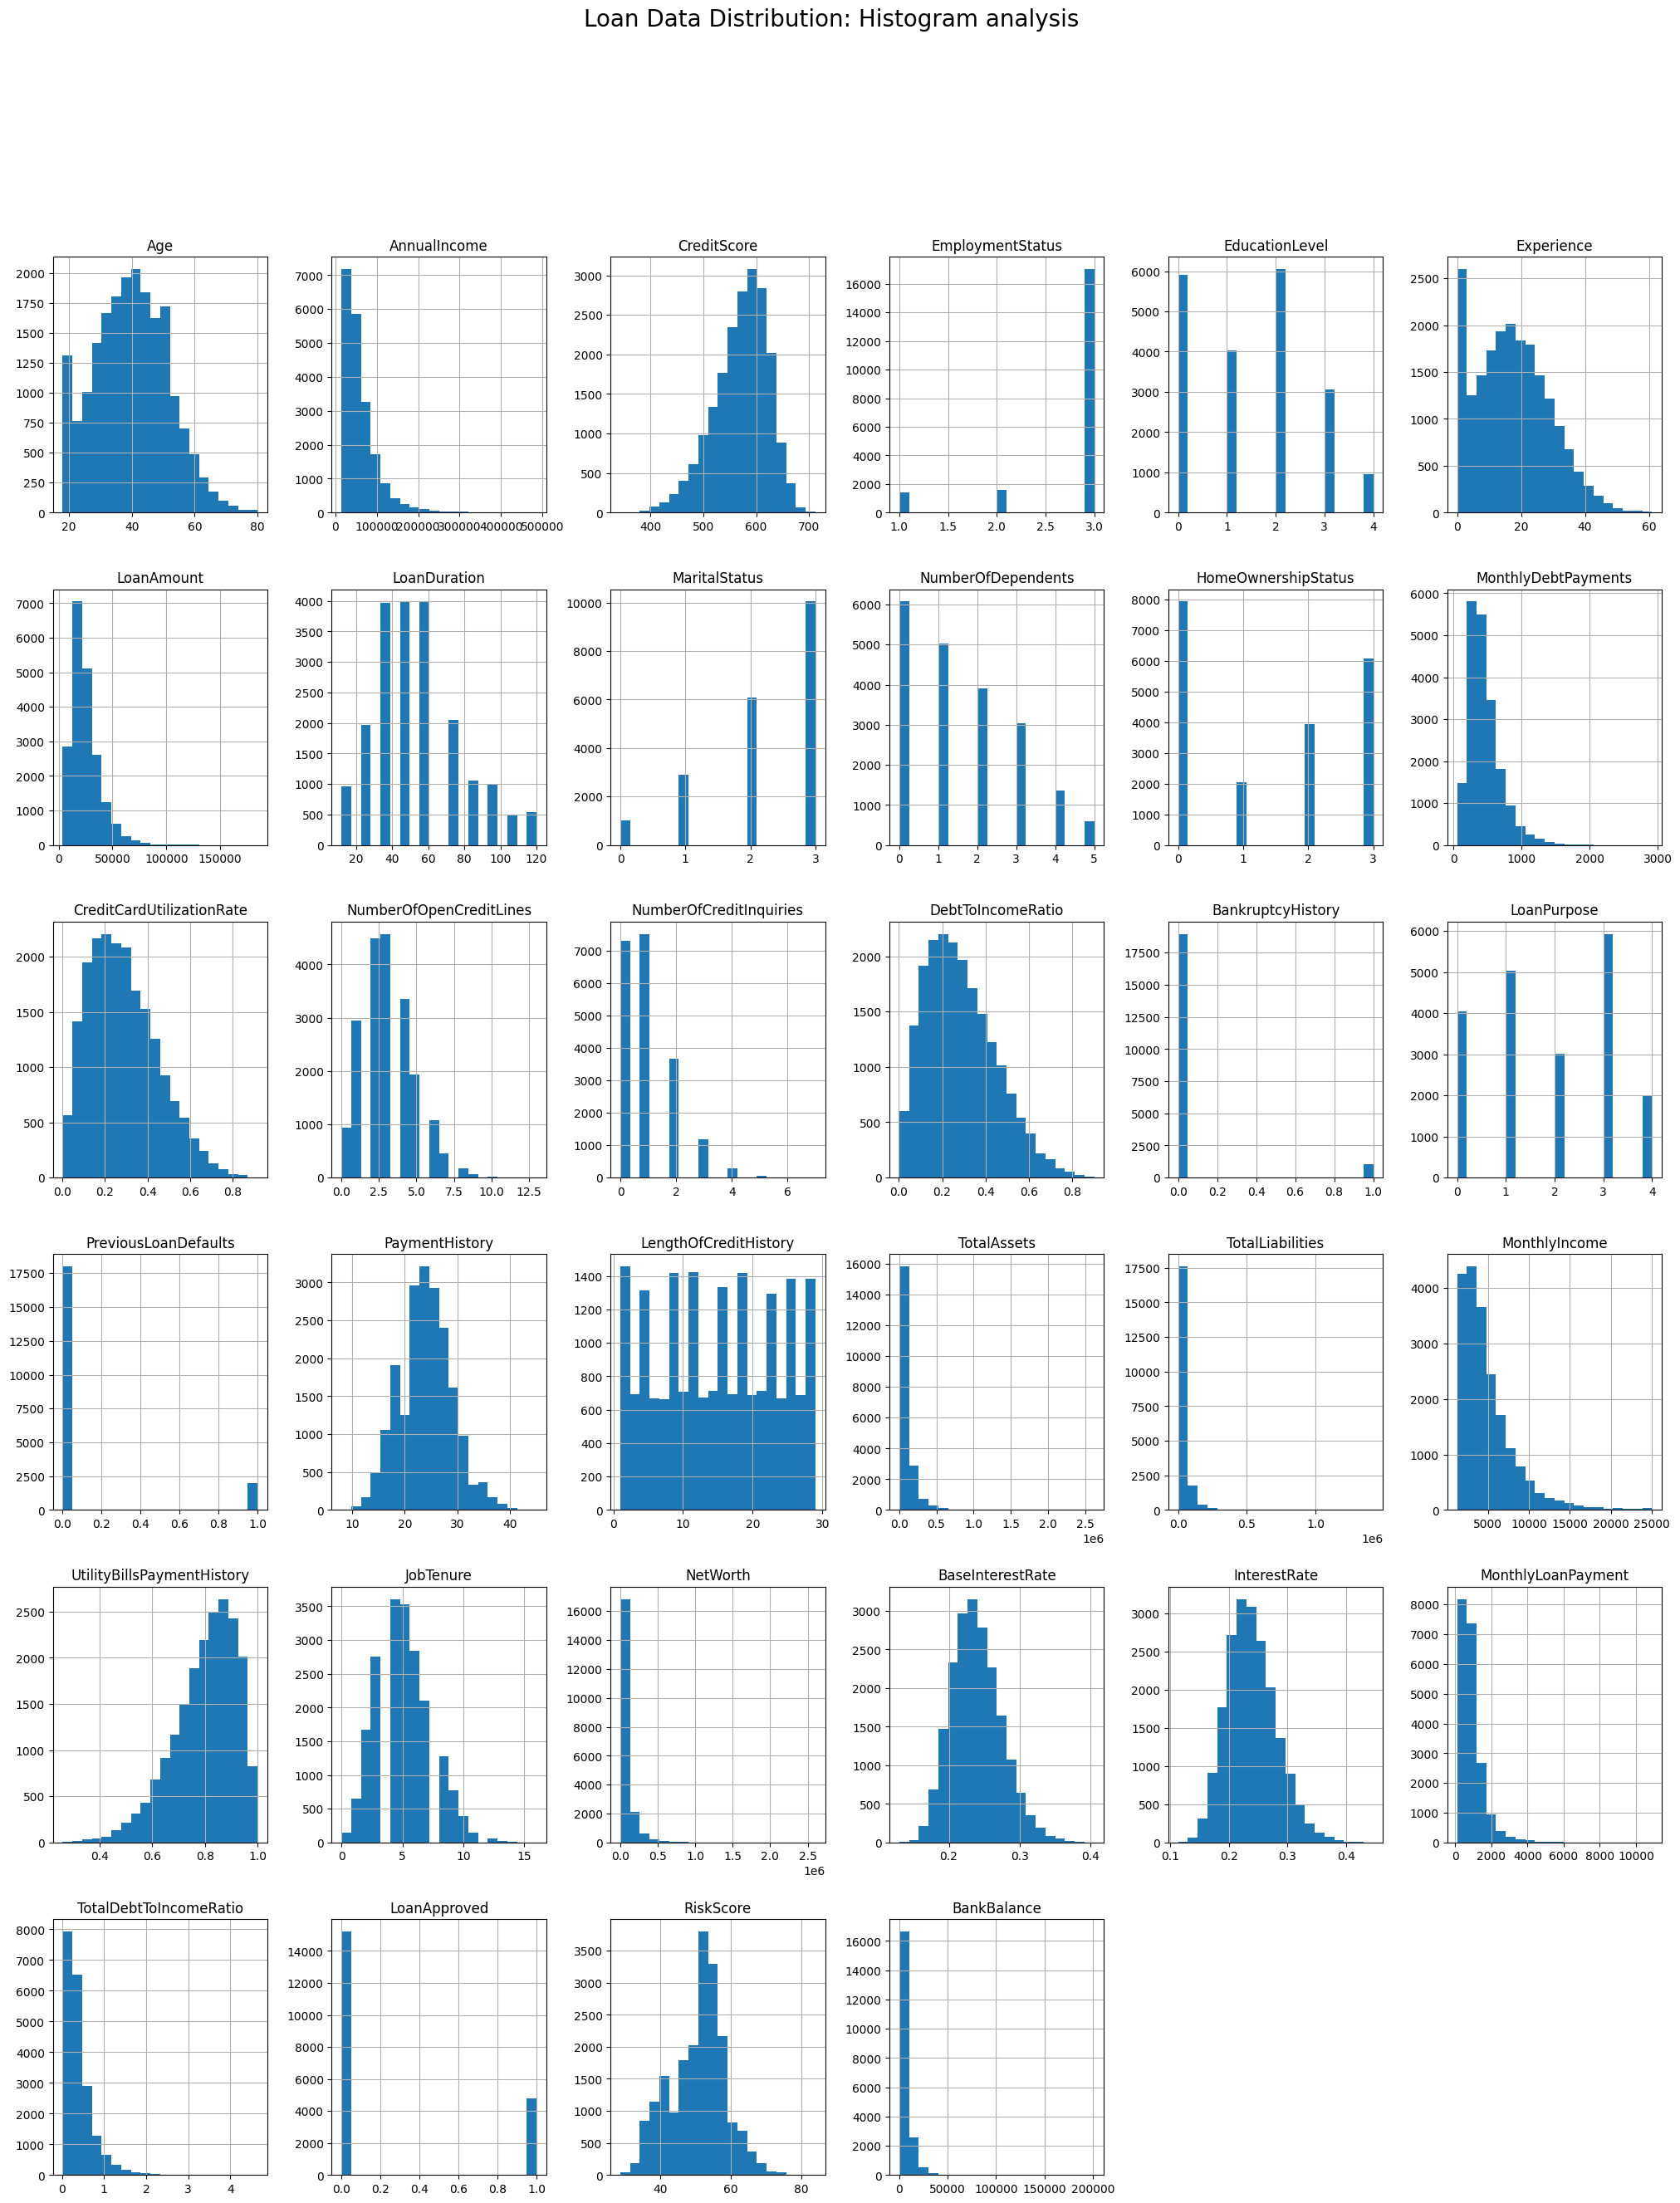

In [30]:
df.hist (bins=20, figsize=(25,30))
plt.suptitle('Loan Data Distribution: Histogram analysis', fontsize=20)
plt.show()

In [31]:
skewness = df.skew()
print(skewness)

Age                           0.185964
AnnualIncome                  2.088948
CreditScore                  -0.596727
EmploymentStatus             -2.455244
EducationLevel                0.273155
Experience                    0.339981
LoanAmount                    1.833688
LoanDuration                  0.651330
MaritalStatus                -0.962494
NumberOfDependents            0.639919
HomeOwnershipStatus           0.071497
MonthlyDebtPayments           1.653435
CreditCardUtilizationRate     0.601131
NumberOfOpenCreditLines       0.599662
NumberOfCreditInquiries       1.012065
DebtToIncomeRatio             0.593858
BankruptcyHistory             4.017672
LoanPurpose                   0.025237
PreviousLoanDefaults          2.665941
PaymentHistory                0.213465
LengthOfCreditHistory         0.002989
TotalAssets                   5.311326
TotalLiabilities              5.848874
MonthlyIncome                 1.992929
UtilityBillsPaymentHistory   -0.846234
JobTenure                

In [32]:
sorted_skewness = skewness.sort_values(ascending=True)
print(sorted_skewness)

EmploymentStatus             -2.455244
MaritalStatus                -0.962494
UtilityBillsPaymentHistory   -0.846234
CreditScore                  -0.596727
RiskScore                    -0.162062
LengthOfCreditHistory         0.002989
LoanPurpose                   0.025237
HomeOwnershipStatus           0.071497
Age                           0.185964
PaymentHistory                0.213465
EducationLevel                0.273155
Experience                    0.339981
JobTenure                     0.436452
BaseInterestRate              0.461850
InterestRate                  0.485491
DebtToIncomeRatio             0.593858
NumberOfOpenCreditLines       0.599662
CreditCardUtilizationRate     0.601131
NumberOfDependents            0.639919
LoanDuration                  0.651330
NumberOfCreditInquiries       1.012065
LoanApproved                  1.224086
MonthlyDebtPayments           1.653435
LoanAmount                    1.833688
MonthlyIncome                 1.992929
AnnualIncome             

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  int64  
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  int64  
 4   EducationLevel              20000 non-null  int64  
 5   Experience                  20000 non-null  int64  
 6   LoanAmount                  20000 non-null  int64  
 7   LoanDuration                20000 non-null  int64  
 8   MaritalStatus               20000 non-null  float64
 9   NumberOfDependents          20000 non-null  int64  
 10  HomeOwnershipStatus         20000 non-null  int64  
 11  MonthlyDebtPayments         20000 non-null  int64  
 12  CreditCardUtilizationRate   20000 non-null  float64
 13  NumberOfOpenCreditLines     200

In [34]:
df_copy =df.copy()
df['AnnualIncome']=np.log1p(df['AnnualIncome'])
df['LoanAmount']=np.log1p(df['LoanAmount'])

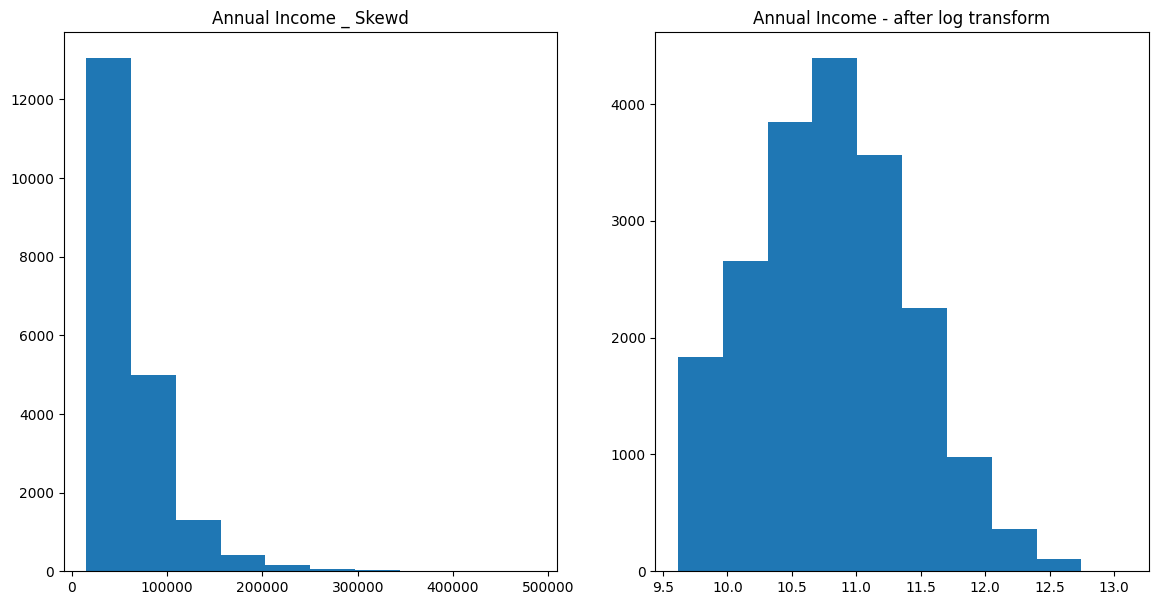

In [35]:
plt.figure(figsize=(14,7))

ax1 = plt.subplot(1,2,1)
cp = plt.hist(df_copy['AnnualIncome'])
plt.title("Annual Income _ Skewd")

ax2=plt.subplot(1,2,2)
plt.hist(df['AnnualIncome'])
plt.title("Annual Income - after log transform")
plt.show()


In [36]:
numeric_columns=df.drop(columns=['LoanApproved']).select_dtypes(include=['number'])

skewness = numeric_columns.skew()

high_skewed_columns = skewness[abs(skewness) > 1].index

for col in high_skewed_columns:
    df[col] = np.log1p(df[col])

df.head

<bound method NDFrame.head of        Age  AnnualIncome  CreditScore  EmploymentStatus  EducationLevel  \
0       45     10.595359          617          1.386294               3   
1       38     10.589358          628          1.386294               1   
2       47     10.614597          570          1.386294               2   
3       58     11.143093          545          1.386294               0   
4       37     11.545054          594          1.386294               1   
...    ...           ...          ...               ...             ...   
19995   44     10.314968          587          1.386294               0   
19996   56     10.804604          567          1.386294               1   
19997   44     10.798738          645          1.386294               2   
19998   60     10.621961          560          1.386294               0   
19999   20     10.882340          574          1.386294               1   

       Experience  LoanAmount  LoanDuration  MaritalStatus  \
0      

## classification modeling

__Binary Loan Approval Classification :__ to determine the binary outcome of loan approval,indicating whether  an applicant is likely to be approved or denied for a loan

In [37]:
df['LoanApproved'] = df['LoanApproved'].astype('int')

x=df.drop(['LoanApproved','RiskScore'], axis=1)
y=df['LoanApproved']

In [38]:
df[['LoanApproved']].value_counts

<bound method DataFrame.value_counts of        LoanApproved
0                 0
1                 0
2                 0
3                 0
4                 1
...             ...
19995             0
19996             0
19997             0
19998             0
19999             0

[20000 rows x 1 columns]>

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.model_selection import train_test_split

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=42,test_size=0.2)

print('shape of training features:', x_train.shape)
print('shape of training features:', x_test.shape)
print('shape of training target:', y_train.shape)
print('shape of training target:', y_test.shape)


shape of training features: (16000, 32)
shape of training features: (4000, 32)
shape of training target: (16000,)
shape of training target: (4000,)


In [42]:
from sklearn.metrics import confusion_matrix


model = LogisticRegression()
model.fit(x_train, y_train)

y_pred=model.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print("Accuracy:", acc)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.879

Confusion Matrix:
 [[2811  172]
 [ 312  705]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      2983
           1       0.80      0.69      0.74      1017

    accuracy                           0.88      4000
   macro avg       0.85      0.82      0.83      4000
weighted avg       0.88      0.88      0.88      4000



c:\Users\Pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## (3.2) Removing unwanted features

__(3.2.1) Based on correlation__

after analyzing the correlations,you can remove:

* one among two highly correlated features (between features themselves).
* features with low correlation with the target variables

<Axes: >

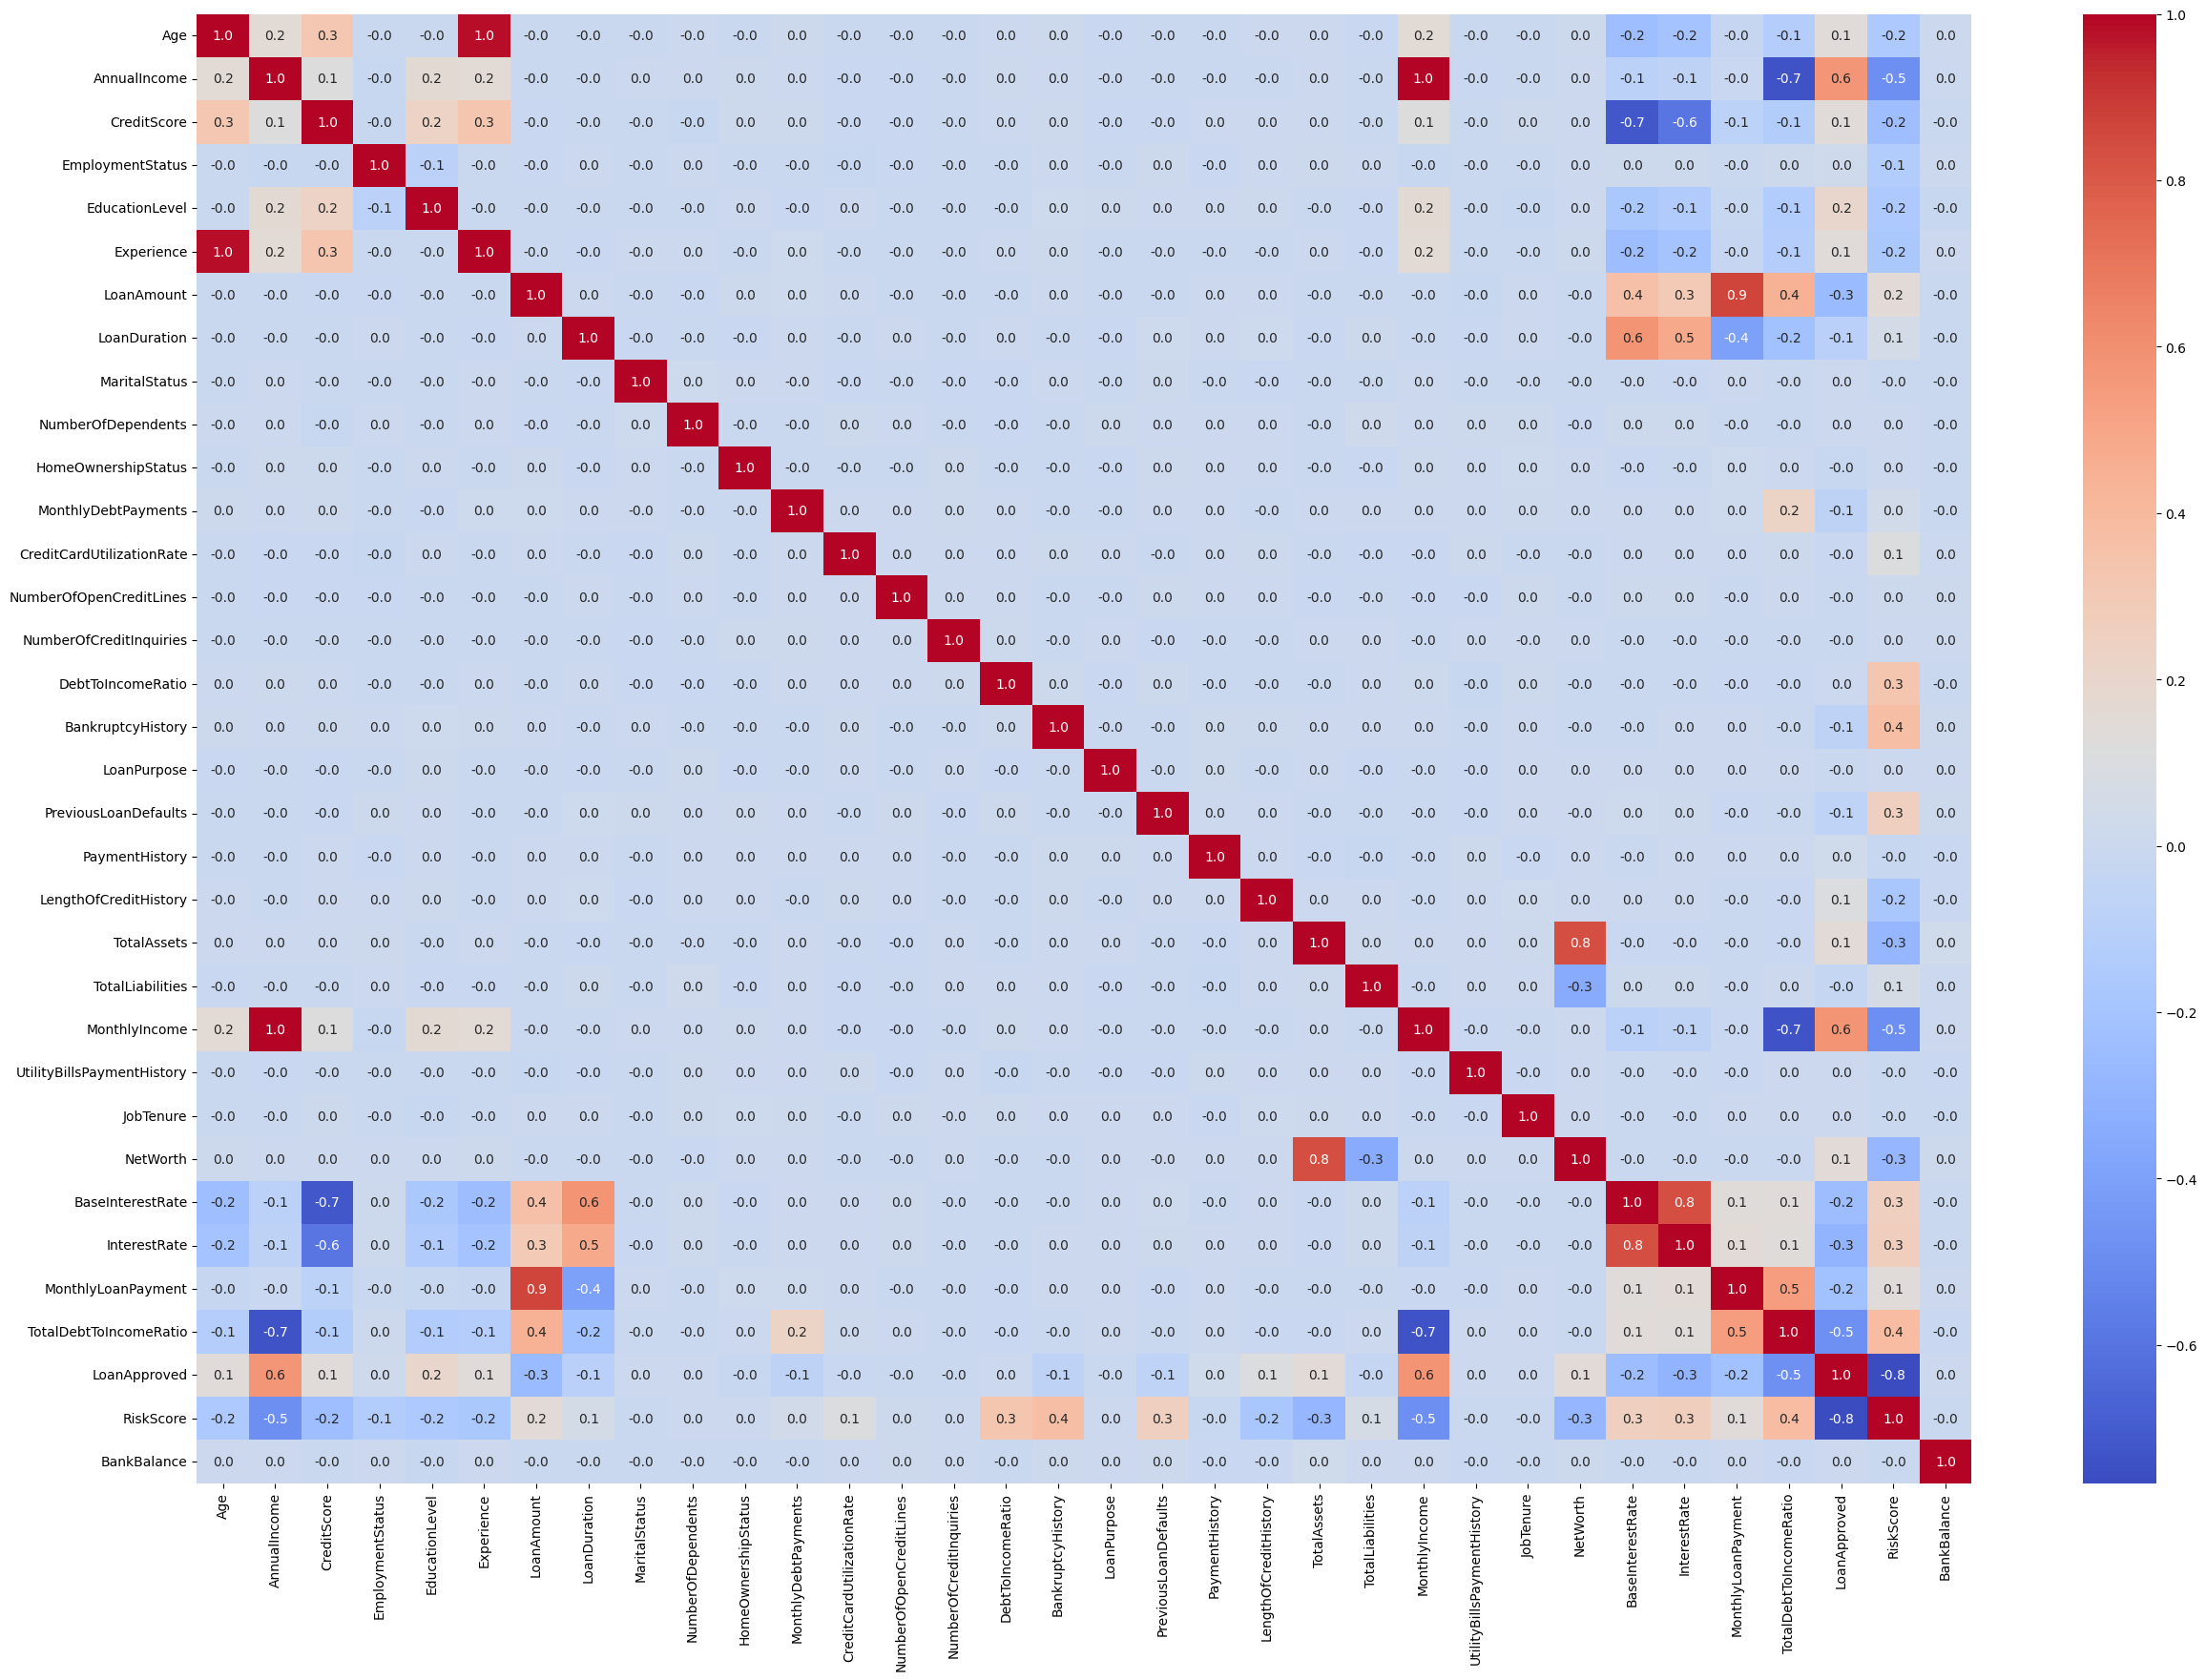

In [43]:
plt.figure(figsize=(30,20))
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='0.01f')

In [44]:
df[['TotalDebtToIncomeRatio','MonthlyIncome']].corr()

,TotalDebtToIncomeRatio,MonthlyIncome
TotalDebtToIncomeRatio,1.000000,-0.736617
MonthlyIncome,-0.736617,1.000000


In [45]:
df.drop('TotalDebtToIncomeRatio',axis=1,inplace=True)

In [46]:
correlation_matrix=df.corr()

threshold=0.5

highly_correlation_pairs=[]
for i in range(len(correlation_matrix.columns)):
    for j in range(i):

        if abs(correlation_matrix.iloc[i,j]) > threshold:
            highly_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i,j]))

print(highly_correlation_pairs)

[('Experience', 'Age', np.float64(0.9829802792421133)), ('MonthlyIncome', 'AnnualIncome', np.float64(0.9957451643326807)), ('NetWorth', 'TotalAssets', np.float64(0.8378228057842566)), ('BaseInterestRate', 'CreditScore', np.float64(-0.7226185591437013)), ('BaseInterestRate', 'LoanDuration', np.float64(0.5792149916757651)), ('InterestRate', 'CreditScore', np.float64(-0.5988444601001294)), ('InterestRate', 'BaseInterestRate', np.float64(0.8345565713776919)), ('MonthlyLoanPayment', 'LoanAmount', np.float64(0.8626796269899988)), ('LoanApproved', 'AnnualIncome', np.float64(0.5770446392239345)), ('LoanApproved', 'MonthlyIncome', np.float64(0.5793089155715024)), ('RiskScore', 'LoanApproved', np.float64(-0.7661374114914472))]


In [47]:
df.drop(['Experience','AnnualIncome','TotalAssets','BaseInterestRate','MonthlyLoanPayment'],axis=1,inplace=True)

In [48]:
corr_with_target=df.corr()['LoanApproved'].sort_values(ascending=False)

low_corr_features=corr_with_target[(corr_with_target > -0.05) & (corr_with_target < 0.05)]

print("features with correlation between -0.05 and 0.05:")
print(low_corr_features)

features with correlation between -0.05 and 0.05:
PaymentHistory                0.030804
EmploymentStatus              0.023355
JobTenure                     0.004997
BankBalance                   0.004973
UtilityBillsPaymentHistory    0.003303
NumberOfDependents            0.001717
MaritalStatus                 0.000999
DebtToIncomeRatio             0.000034
NumberOfOpenCreditLines      -0.004769
NumberOfCreditInquiries      -0.006837
LoanPurpose                  -0.007062
CreditCardUtilizationRate    -0.010466
HomeOwnershipStatus          -0.018135
TotalLiabilities             -0.033293
Name: LoanApproved, dtype: float64


In [49]:
df.drop(['JobTenure','UtilityBillsPaymentHistory','NumberOfDependents','DebtToIncomeRatio','NumberOfOpenCreditLines','NumberOfCreditInquiries','MaritalStatus','LoanPurpose'],axis=1,inplace=True)

In [50]:
corr_with_target=df.corr()['RiskScore'].sort_values(ascending=False)

low_corr_features=corr_with_target[(corr_with_target > -0.05) & (corr_with_target < 0.05)]

print("features with correlation between -0.05 and 0.05:")
print(low_corr_features)

features with correlation between -0.05 and 0.05:
MonthlyDebtPayments    0.037533
HomeOwnershipStatus    0.004454
BankBalance           -0.001408
PaymentHistory        -0.016992
Name: RiskScore, dtype: float64


In [51]:
df.drop(['MonthlyDebtPayments','HomeOwnershipStatus','BankBalance','PaymentHistory'], axis=1, inplace=True)

In [52]:
df.columns

Index(['Age', 'CreditScore', 'EmploymentStatus', 'EducationLevel',
       'LoanAmount', 'LoanDuration', 'CreditCardUtilizationRate',
       'BankruptcyHistory', 'PreviousLoanDefaults', 'LengthOfCreditHistory',
       'TotalLiabilities', 'MonthlyIncome', 'NetWorth', 'InterestRate',
       'LoanApproved', 'RiskScore'],
      dtype='object')

In [53]:
df.drop(['LoanDuration'],axis=1,inplace=True)

In [54]:
df.drop(['EducationLevel'],axis=1,inplace=True)

In [55]:
df.drop(['Age'],axis=1,inplace=True)

## PCA

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
loan_pca = pca.fit_transform(df)
loan_pca_df=pd.DataFrame(loan_pca,columns=[f'pc{i+1}' for i in range(loan_pca.shape[1])])

loan_pca_df.head()

,pc1,pc2,pc3,pc4,pc5
0,45.415174,-5.118313,-3.169339,1.366396,0.452286
1,56.295089,-6.876209,-0.186042,0.849097,-0.549041
2,-1.650931,5.432397,4.699813,-2.103010,1.017807
3,-26.719507,-5.348648,-0.664362,1.748807,-0.831836
4,22.939614,17.472763,-6.044703,1.258176,0.367192


# (3.3)SCALING

## Standerdization

In [57]:
from sklearn.preprocessing import StandardScaler,minmax_scale,RobustScaler


loan_scaled_df=df.copy()

numeric_columns = df.drop(columns=['LoanApproved']).select_dtypes(include=['number']).columns

scaler = StandardScaler()

loan_scaled_df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
loan_scaled_df.head()

,CreditScore,EmploymentStatus,LoanAmount,CreditCardUtilizationRate,BankruptcyHistory,PreviousLoanDefaults,LengthOfCreditHistory,TotalLiabilities,MonthlyIncome,NetWorth,InterestRate,LoanApproved,RiskScore
0,0.890021,0.37913,-1.014008,0.425792,-0.235154,-0.333426,-0.711630,-0.136881,-0.324366,1.020941,-0.272968,0,-0.227149
1,1.105724,0.37913,0.343015,-1.242602,-0.235154,-0.333426,-0.711630,-0.828648,-0.334247,0.287206,-0.901165,0,0.158551
2,-0.031618,0.37913,-0.432362,-0.932273,-0.235154,-0.333426,0.841287,1.765237,-0.292687,-1.172566,-0.629370,0,0.158551
3,-0.521852,0.37913,1.087972,-0.117617,-0.235154,-0.333426,-0.592175,-1.408173,0.577602,0.853401,1.464331,0,0.415684
4,0.439006,0.37913,-1.727221,0.213746,-0.235154,-0.333426,1.438563,-0.240858,1.239575,1.420252,-1.495584,1,-1.898515


In [77]:
df.describe()

,CreditScore,EmploymentStatus,LoanAmount,CreditCardUtilizationRate,BankruptcyHistory,PreviousLoanDefaults,LengthOfCreditHistory,TotalLiabilities,MonthlyIncome,NetWorth,InterestRate,LoanApproved,RiskScore
count,16305.000000,16305.000000,16305.000000,16305.000000,16305.0,16305.0,16305.000000,16305.000000,16305.000000,16305.000000,16305.000000,16305.000000,16305.000000
mean,574.268323,1.315005,9.990122,0.282781,0.0,0.0,14.907084,10.002525,8.305667,10.268552,0.236617,0.257651,49.338767
std,47.749891,0.186924,0.486687,0.155012,0.0,0.0,8.383877,0.972357,0.600731,1.456475,0.039255,0.437354,6.971242
min,437.000000,0.693147,8.631949,0.000974,0.0,0.0,1.000000,7.303170,7.131699,6.912743,0.129550,0.000000,28.800000
25%,543.000000,1.386294,9.653165,0.160588,0.0,0.0,8.000000,9.330875,7.877966,9.080573,0.208296,0.000000,44.800000
50%,580.000000,1.386294,9.992414,0.263913,0.0,0.0,15.000000,10.011086,8.303113,10.408044,0.234042,0.000000,51.000000
75%,609.000000,1.386294,10.329409,0.386140,0.0,0.0,22.000000,10.672113,8.726887,11.394390,0.262901,1.000000,54.000000
max,712.000000,1.386294,11.355675,0.734895,0.0,0.0,29.000000,12.672918,10.004328,14.770613,0.346996,1.000000,67.000000


# HANDLING  OUTLIERS

__BOX PLOTS__

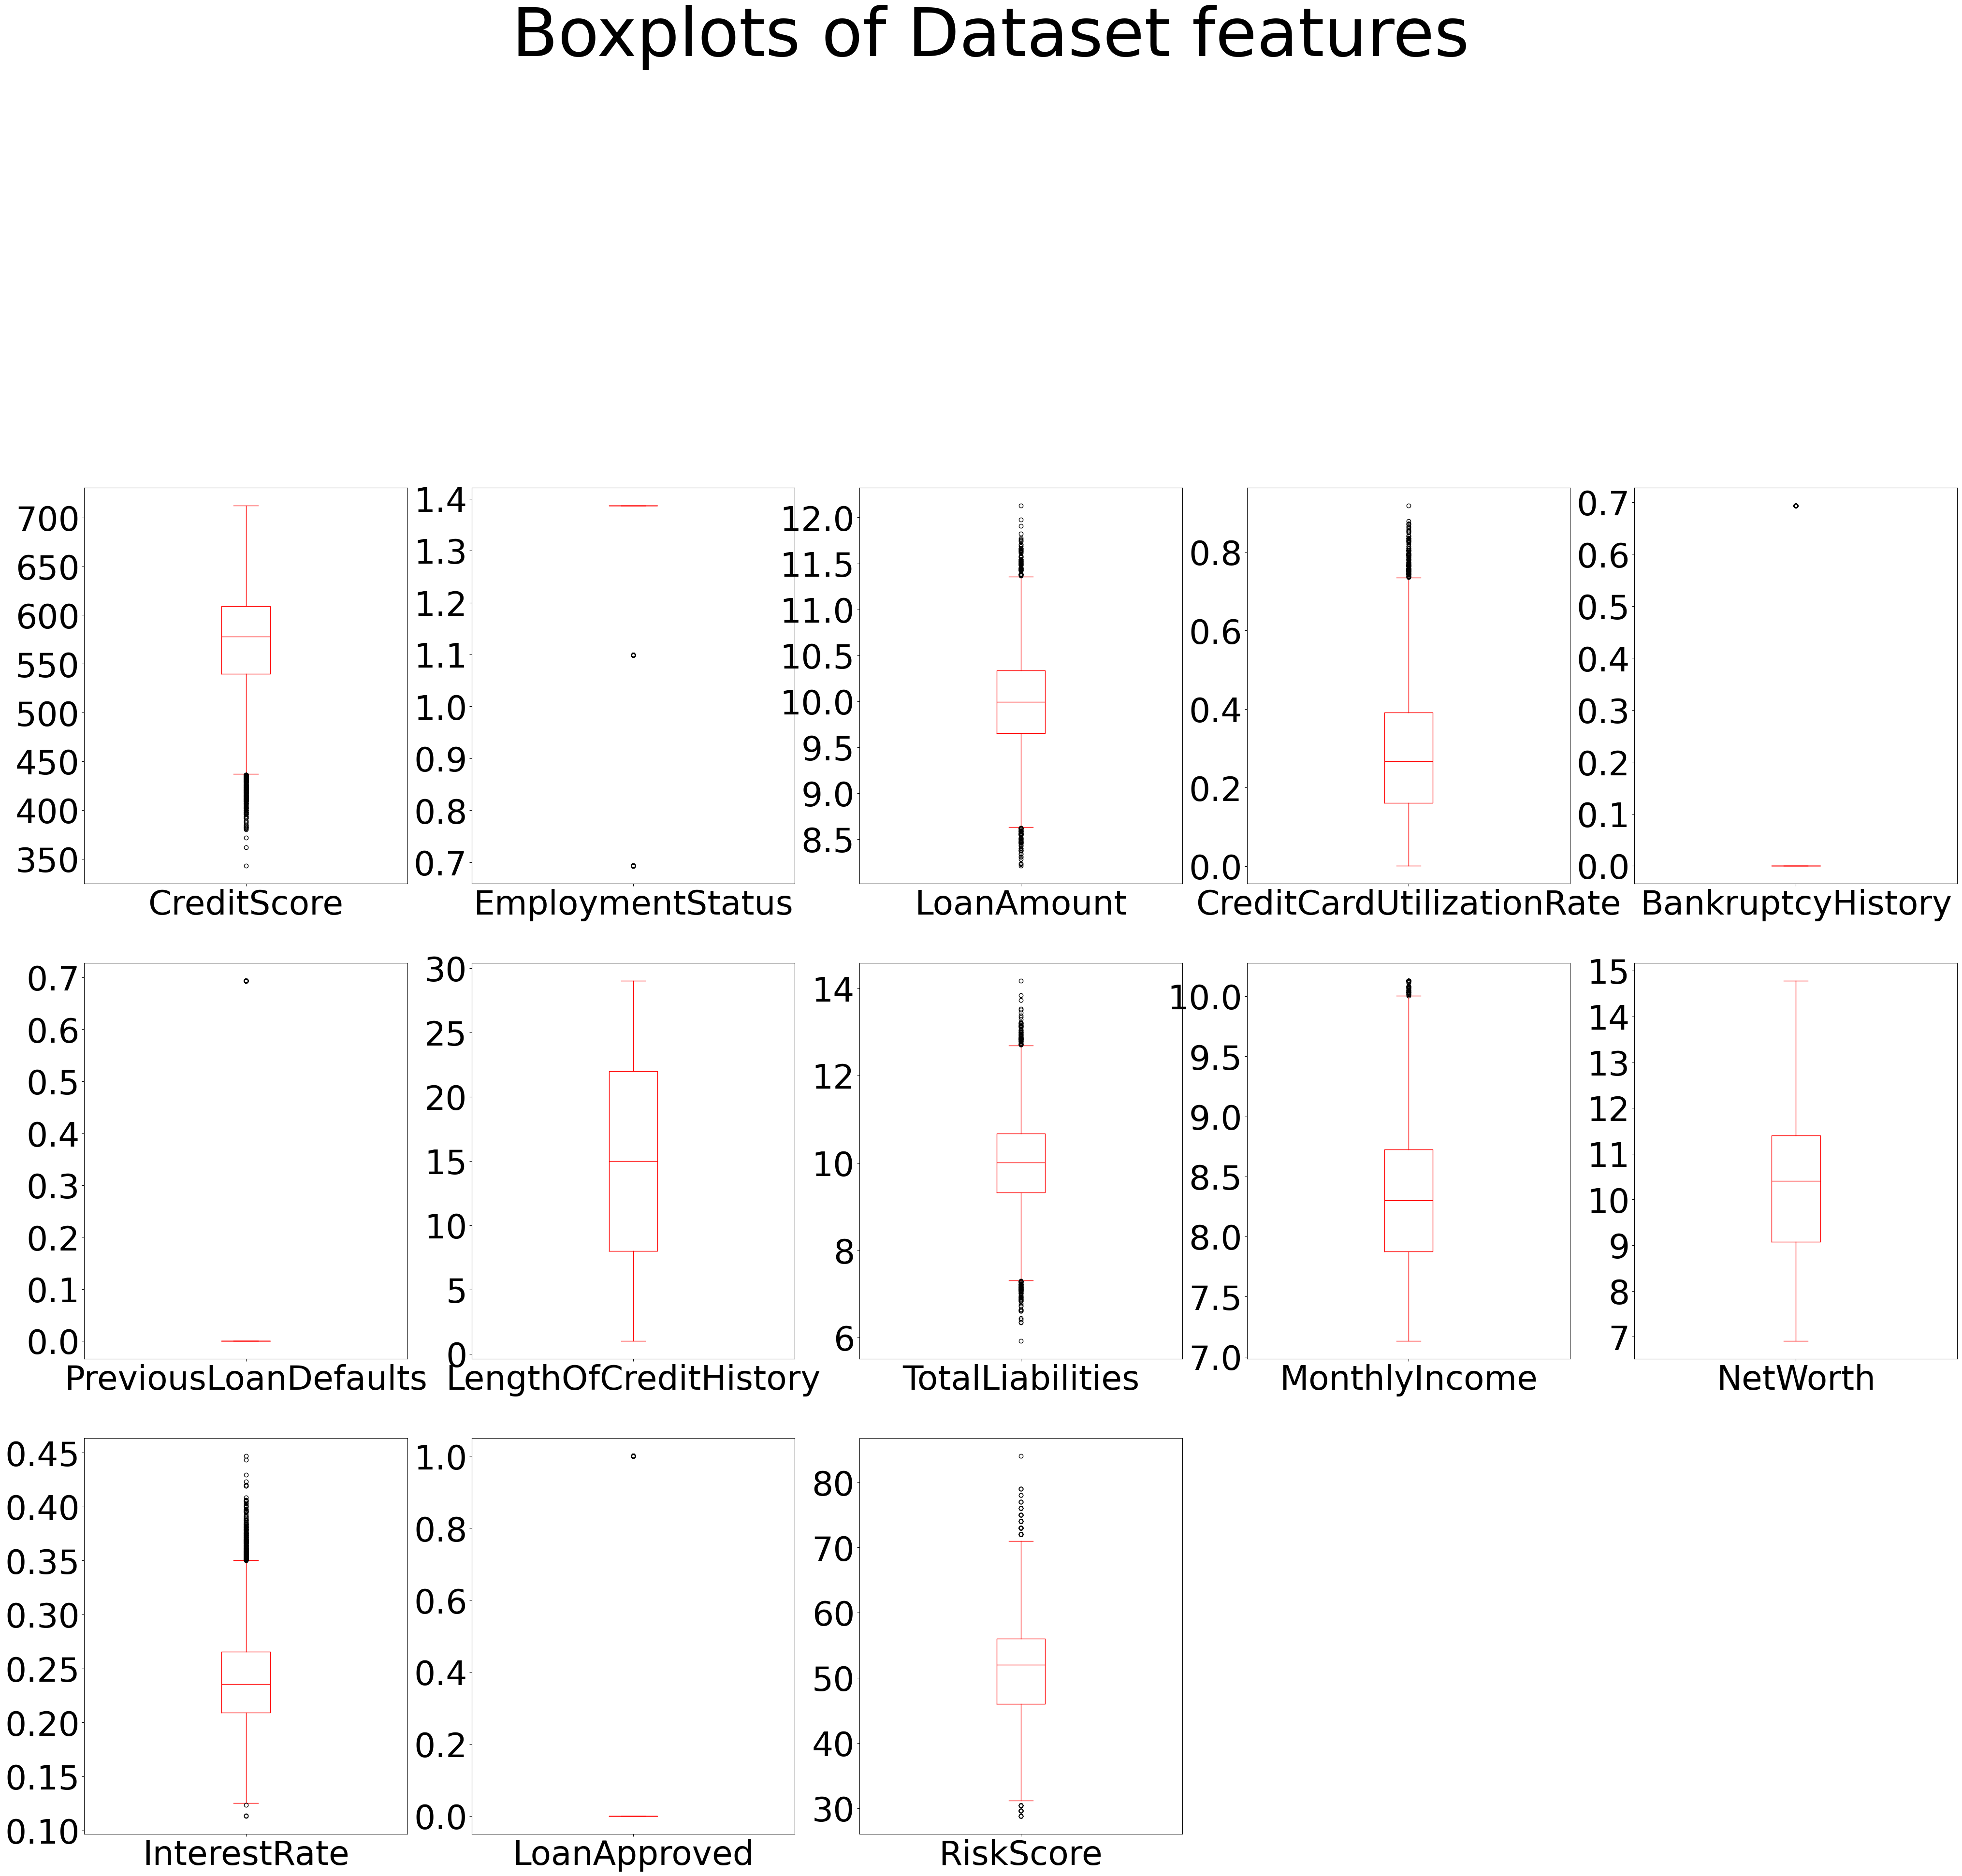

In [59]:
df.plot(kind='box', subplots=True, layout=(8,5), figsize=(50,100),color='red',fontsize=(50))

plt.suptitle("Boxplots of Dataset features", fontsize=100)
plt.show()

In [60]:
loan_df_copy=df.copy()

def remove_outliers_iqr(df,exclude_column):
    for column in df.select_dtypes(include=['number']):
        if column in exclude_column:
            continue

        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1   

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

exclude_column = ['LoanApproved', 'RiskScore','EmploymentStatus']

df = remove_outliers_iqr(df,exclude_column)

print("Shape of data before removing outliers:", loan_df_copy.shape)
print("Shape of data after removing outliers:", df.shape)
print("number of outliers removed:", loan_df_copy.shape[0] - df.shape[0])

Shape of data before removing outliers: (20000, 13)
Shape of data after removing outliers: (16305, 13)
number of outliers removed: 3695


## step-4: Model Training and Evaluation

## Classification Modelling

classification modelling

In [61]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
pip install naive_bayes

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor, BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn import tree

In [65]:
class_models = {'lr':LogisticRegression(max_iter=500),
               'rfc':RandomForestClassifier(),
               'dtc':DecisionTreeClassifier(),
               'knn':KNeighborsClassifier(n_neighbors=11),
               'gbc':GradientBoostingClassifier(random_state=0, learning_rate=0.45),
               'etc':ExtraTreesClassifier(),}
              

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = {'Model':[], 'Accuracy':[], 'Precision':[], 'Recall':[], 'F1 Score':[]}

for model_name, model in class_models.items():
    model.fit(x_train, y_train)
    model_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, model_pred)
    precision = precision_score(y_test, model_pred)
    recall = recall_score(y_test, model_pred)
    f1 = f1_score(y_test, model_pred)

   
    results['Model'].append(model)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)

results_df =pd.DataFrame(results)

results_df

c:\Users\Pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Accuracy,Precision,Recall,F1 Score
0,LogisticRegression(max_iter=500),0.90475,0.839744,0.772861,0.804916
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.92600,0.895719,0.802360,0.846473
2,DecisionTreeClassifier(),0.88900,0.789687,0.767945,0.778664
3,KNeighborsClassifier(n_neighbors=11),0.73975,0.451220,0.109145,0.175772
4,([DecisionTreeRegressor(criterion='friedman_ms...,0.95500,0.926606,0.893805,0.909910
5,"(ExtraTreeClassifier(random_state=1622806483),...",0.93100,0.928324,0.789577,0.853348


In [67]:
x2s=loan_scaled_df.drop('LoanApproved', axis=1)
y2s=loan_scaled_df['LoanApproved']

x2s_train,x2s_test,y2s_train,y2s_test=train_test_split(x2s,y2s, random_state=42,test_size=0.2)

results={'model':[], 'accuracy':[], 'precision':[], 'recall':[], 'f1_score':[]}

for model_name, model in class_models.items():

    model.fit(x2s_train, y2s_train)
    model_pred2s = model.predict(x2s_test)

    accuracy2 = accuracy_score(y2s_test, model_pred2s)
    precision2 = precision_score(y2s_test, model_pred2s)
    recall2 = recall_score(y2s_test, model_pred2s)
    f12 = f1_score(y2s_test, model_pred2s)

    results['model'].append(model_name)
    results['accuracy'].append(accuracy2)
    results['precision'].append(precision2)
    results['recall'].append(recall2)
    results['f1_score'].append(f12)

results_df2 =pd.DataFrame(results)

results_df2=results_df2.sort_values(by='accuracy', ascending=False)

results_df2.style.background_gradient('Reds')


,model,accuracy,precision,recall,f1_score
4,gbc,0.999000,0.998033,0.998033,0.998033
0,lr,0.997000,0.996051,0.992134,0.994089
5,etc,0.995500,0.992118,0.990167,0.991142
1,rfc,0.993500,0.992056,0.982301,0.987154
2,dtc,0.990500,0.982266,0.980334,0.981299
3,knn,0.990250,0.994939,0.966568,0.980549


## Regression modeling

__risk score regression:__ to predict a continuous risk score associated with each individual's likelihood of loan default or financial instability.

In [ ]:
models={'Logistic Regression':LinearRegression(),
        'RandomForestRegressor':RandomForestRegressor(),
        'GradientBoostingRegressor':GradientBoostingRegressor(),
        'DecisionTreeRegressor':DecisionTreeRegressor(),
        'svm':SVR(),
        #'MLP_Regressor':MLPRegressor(max_iter=500),
        'AdaBoostRegressor':AdaBoostRegressor(),
        'ExtraTreesRegressor':ExtraTreesRegressor(),
        'BaggingRegressor':BaggingRegressor(),
        'LGBMRegressor':LGBMRegressor(),
       #'catboostRegressor':CatBoostRegressor(),
        'XGBRegressor':XGBRegressor()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
}

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [70]:
x1=df.drop(['RiskScore','LoanApproved'], axis=1)
y1=df['RiskScore']

In [71]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1, random_state=42,test_size=0.2)

print('shape of training features:', x1_train.shape)
print('shape of testing features:', x1_test.shape)
print('shape of training target:', y1_train.shape)
print('shape of testing target:', y1_test.shape)

shape of training features: (13044, 11)
shape of testing features: (3261, 11)
shape of training target: (13044,)
shape of testing target: (3261,)


In [72]:

results={'model':[], 'MSE':[], 'MAE':[], 'R2':[]}

for model_name, model in models.items():
    model.fit(x1_train, y1_train)
    
    y1_pred = model.predict(x1_test)

    mse = mean_squared_error(y1_test, y1_pred)
    mae = mean_absolute_error(y1_test, y1_pred)
    r2 = r2_score(y1_test, y1_pred)

    results['model'].append(model_name)
    results['MSE'].append(mse)
    results['MAE'].append(mae)
    results['R2'].append(r2)

results_df = pd.DataFrame(results)

results_df

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1800
[LightGBM] [Info] Number of data points in the train set: 13044, number of used features: 9
[LightGBM] [Info] Start training from score 49.358709


,model,MSE,MAE,R2
0,Logistic Regression,19.729792,3.604610,0.590778
1,RandomForestRegressor,13.909567,2.920380,0.711497
2,GradientBoostingRegressor,13.547786,2.910327,0.719001
3,DecisionTreeRegressor,27.410500,3.912603,0.431470
4,svm,44.996935,5.203932,0.066705
5,AdaBoostRegressor,22.292893,3.799973,0.537616
6,ExtraTreesRegressor,13.740920,2.933753,0.714995
7,BaggingRegressor,15.064660,3.038117,0.687539
8,LGBMRegressor,13.126148,2.870621,0.727747
9,XGBRegressor,14.624620,3.015597,0.696666


In [73]:
x1s=df.drop(['RiskScore','LoanApproved'], axis=1)
y1s=df['RiskScore']


x1s_train,x1s_test,y1s_train,y1s_test=train_test_split(x1s,y1s, random_state=42,test_size=0.2)

print('shape of training features:', x1s_train.shape)
print('shape of testing features:', x1s_test.shape)
print('shape of training target:', y1s_train.shape)
print('shape of testing target:', y1s_test.shape)



results={'model':[], 'MSE':[], 'MAE':[], 'R2':[]}

for model_name, model in models.items():
    model.fit(x1s_train, y1s_train)
    
    y1s_pred = model.predict(x1s_test)

    mse1 = mean_squared_error(y1s_test, y1s_pred)
    mae1 = mean_absolute_error(y1s_test, y1s_pred)
    r21 = r2_score(y1s_test, y1s_pred)

    results['model'].append(model_name)
    results['MSE'].append(mse1)
    results['MAE'].append(mae1)
    results['R2'].append(r21)

results_df1 =pd.DataFrame(results)

results_df1=results_df1.sort_values(by='R2', ascending=False)

results_df1.style.background_gradient('YlOrRd')  # this is to put color


shape of training features: (13044, 11)
shape of testing features: (3261, 11)
shape of training target: (13044,)
shape of testing target: (3261,)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1800
[LightGBM] [Info] Number of data points in the train set: 13044, number of used features: 9
[LightGBM] [Info] Start training from score 49.358709


,model,MSE,MAE,R2
8,LGBMRegressor,13.126148,2.870621,0.727747
2,GradientBoostingRegressor,13.545881,2.910150,0.719041
6,ExtraTreesRegressor,13.778725,2.933057,0.714211
1,RandomForestRegressor,13.970898,2.927652,0.710225
9,XGBRegressor,14.624620,3.015597,0.696666
7,BaggingRegressor,15.524740,3.064618,0.677997
0,Logistic Regression,19.729792,3.604610,0.590778
5,AdaBoostRegressor,22.462008,3.808147,0.534109
3,DecisionTreeRegressor,27.974634,3.957436,0.419770
4,svm,44.996935,5.203932,0.066705


Based on the analysis of the loan approval dataset for predicting the 'risk score' ,the 'gradient boosting regressor' model demonstrated the best performance among the tested models.

Based on the evaluation of the classification models for predicting loan approval, the 'GradientBoostingClassifier' with a learning rate of 0.45 and random state set to 0 emerged as the best-performing model.it achieved the highest accuracy, consistently strong results across precision, recall, and F1-score, making it the most reliable model for classifying whether a loan is approved or not in the loan dataset.

In [74]:
import pickle

r_model = GradientBoostingRegressor()
r_model.fit(x1_train, y1_train.values.ravel())
with open('regression_model.pkl', 'wb') as file:
    pickle.dump(r_model, file)

c_model= GradientBoostingClassifier(random_state=0, learning_rate=0.45)
c_model.fit(x2s_train, y2s_train.values.ravel())
with open('classification_model.pkl', 'wb') as file:
    pickle.dump(c_model, file)